# The TESS mission

The TESS telescope observes stars for long periods of time, just under a month per sector. By doing so, TESS observes how the brightness of a star changes over time. Not all data for the stars in a given sector is recorded. Instead, pixels are selected around certain *targeted* stars. These cut-out images are called Target Pixel Files, or TPFs. 

TPFs can be thought of as stacks of images, with one image for every telescopic time stamp. Each time stamp is referred to as a cadence. The TPF images are cut-out *postage stamps* of the full CCD observations, making them easier to work with. TPFs also include information about the astronomical background to the image, which is removed from the raw flux, and the aperture used to compute the *aperture photometry* of your target.

Mind the difference with the full-frame images (FFIs). A single FFI is the full set of all science and collateral pixels across all CCDs of a given camera. FFIs were taken every 1800 seconds during science operations in the primary mission, every 600 seconds during the first extended mission, and every 200 seconds during the second extended mission. 

##  TESS data products

The TESS data processing pipeline is currently being developed by the *Science Processing Operations Center* (SPOC) at NASA Ames Research Center. It builds on the legacy of the Kepler data processing pipeline. SPOC produces Target Pixel files and Lightcurve files. More information can be found on the [Documentation page](https://heasarc.gsfc.nasa.gov/docs/tess/documentation.html). \ Full Frame Images are processed by the Quick-Look Pipeline (QLP) at the TESS Science Office (TSO). QLP performs multi-aperture photometry to extract lightcurves for all targets captured in the FFIs brighter than TESS magnitude T = 13.5 mag.

The *data products* available from TESS are described in the [official TESS data products](https://archive.stsci.edu/missions-and-data/tess/data-products). We are interested in the following data products:
- **Target Pixel File** stored as `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_tp.fits`.
- **Light Curve File** stored as `tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_lc.fits`.

Where:
- `{date-time}`: The time-stamp associated with this file, in the yyyydddhhmmss format.
- `{sctr}`: A zero-padded, four-digit integer indicating the sector in which the data were collected, starting with Sector 1.
- `{tid}`: A zero-padded, 16-digit target identifier that refers to an object in the TESS Input Catalog.
- `{scid}`: A zero-padded, four-digit identifier of the spacecraft configuration map used to process this data.
- `{cr}`: A string character that denotes the cosmic ray mitigation procedure. 

Note how the names of the two files differ in the last two letters before the extension, i.e., `_tp.fits` for the Target Pixel file and `_lc.fits` for the Light Curve file. Light Curve files are obtained using the data in the TPFs; for this reason, they share the same name.

Additional information on TESS data products and how to access them can be found in [Section 6 - Data Search Tutorials](https://outerspace.stsci.edu/display/TESS/6.0+-+Data+Search+Tutorials) of the [TESS Archive Documentation Center](https://outerspace.stsci.edu/display/TESS/TESS+Archive+Documentation+Center+Home).


## Download the data products from MAST

Before searching for TESS data, you have to find the [Tess Input Catalog](https://tess.mit.edu/science/tess-input-catalogue/) Identification Number (TIC ID or TIC number). Make sure to distinguish this number from the [Tess Object of Interest (TOI)](https://tess.mit.edu/toi-releases/), which is used only for targets with candidate planets identified by TESS.
To search for the TIC number of your target, go to the 
[The Exoplanet Follow-up Observing Program (ExoFOP) website](https://exofop.ipac.caltech.edu/tess/) and search your target using the `STARS - Search your target` search box. A new page will load with all the information collected by the TESS Science Team related to your target, including its TIC number. Take note of it and proceed to the next step. 

The official archive for [TESS mission](https://archive.stsci.edu/missions-and-data/tess) data products is the [Mikulski Archive for Space Telescopes (MAST)](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html) which is hosted at the [Space Telescope Science Institute (STScI)](https://www.stsci.edu/). In the [home page of MAST](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html), enter the name of your target in the box below `and enter target` and press `Search`

You will get a list of all observations from space mission archives hosted at MAST, including observations for stars within 0.2 degrees from your target.
To restrict your search, apply the following filters on the left side of the results page:
- select `TESS` under the `Mission` filter
- select `SPOC` under the `Provenance Name` filter 
- select the TIC number corresponding to your target under the `Target Name` filter

You should be left with a restricted number of observations available for download. There are two selections that you have to perform manually before downloading the data:
- Scroll horizontally the page to visualize the column `Observation ID`. Each ID ending with `-s` corresponds to a specific sector - a target may have been observed in more than one sector. The sector's number is included in the file name, according to the scheme presented earlier.
- Starting with the first extended mission, TESS has a [higher cadence mode of 20 seconds for asteroseismology studies](https://iopscience.iop.org/article/10.3847/1538-3881/ac3000). Search for the column named `Exposure Length` and identify the observations with exposure time equal to 120 seconds

You need to download only those observations with **Observation ID ending with `-s`** and **exposure time equal to 120 seconds**.

Save the files by clicking on the *floppy disk* icon. Unzip the downloaded files, identify the *target pixel file* for each sector, and copy it with a shorter name in the folder with your working Jupyter notebooks (for easier access) **while preserving the sector number**, as in this example:

```bash
cp Downloads/MAST_2023-11-29T0708/TESS/tess2020078014623-s0023-0000000168699373-0177-s/tess2020078014623-s0023-0000000168699373-0177-s_tp.fits hatp44_tess_0023_tp.fits
``` 

Do the same also for the *light curve files*, paying attention to not overwrite the *target pixel files* (note the `_lc.fits` instead of `_tp.fits`

```bash
cp Downloads/MAST_2023-11-29T0708/TESS/tess2020078014623-s0023-0000000168699373-0177-s/tess2020078014623-s0023-0000000168699373-0177-s_lc.fits hatp44_tess_0023_lc.fits
``` 

## Access the Target Pixel File

Let's start by importing some libraries to the environment:

- numpy to handle array functions
- astropy.io fits for accessing FITS files
- astropy.wcs WCS for World Coordinate Systems
- matplotlib.pyplot for plotting data

We then read our target pixel files, paying attention to the name of the sectors:


In [1]:
%matplotlib widget 
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

In [2]:
# we define a common directory name
sector23_tpf = "hatp44_s0023_tp.fits"
sector49_tpf = "hatp44_s0049_tp.fits"
sector50_tpf = "hatp44_s0050_tp.fits"

## Contents of Target Pixel File
Now that we have the file, we can now explore its contents. 
A FITS file comprises segments called Header/Data Units (HDUs), where the first HDU is called the `Primary HDU` or `Primary Array`.
The target pixel file contains four extensions: a PRIMARY header, a PIXELS extension, an APERTURE extension and a TARGET COSMIC RAY extension.

- **No. 0 (Primary):**  
This HDU contains meta-data related to the entire file.
- **No. 1 (Pixels):**  
This HDU contains a binary table with 11 columns containing a time series of scalar values or images.
- **No. 2 (Aperture):**  
This HDU contains an image that gives information about each pixel and how it was used by the TESS pipeline in the data processing.
- **No. 3 (Target Cosmic Ray):**  
This HDU is new in the TESS target pixel files and describes the cosmic rays identified and subtracted from the target pixels. These cosmic ray corrections are only available if the TESS Pipeline cosmic ray correction algorithm was enabled during processing.

We can use the `fits.info` command to explore the content of the TPF without opening it:

In [3]:
fits.info(sector23_tpf)


Filename: hatp44_s0023_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   19279R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [4]:

# With this command we open the fits file
tphdu = fits.open(sector23_tpf)

## Contents of the PIXELS extension.
The pixels extension contains raw and calibrated pixels collected by the spacecraft at a 2-minute cadence. Here is a sumary of the columns available in that extension.

- **TIME**: Time of mid-cadence stored in BJD-2457000.0.
- **CADENCENO**: Cadence number
- **RAW_CNTS**: The raw counts per pixel before any processing.
- **FLUX**: The calibrated, background subtracted pixels for each cadence.
- **FLUX_BKG**: The background measured and removed for these pixels.
- **QUALITY**: Quality flags.
- **POS_CORR1 & POS_CORR2**: The (column,row) local motion of the star calculated from the motion polynomials. Motion polynomials are calculated from the PSF centroids of select stars on each CCD.

We can use the `columns` method to explore the content of a specific HDU, in this case, the second one. 

In [5]:
tphdu[1].columns


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

We can use the information stored in the header of the FITS file to display the position of our target in the Equatorial System reference frame (i.e., Right Ascension and Declination) using the [World Coordinate System]( https://docs.astropy.org/en/stable/wcs/) through the `astropy` package. This is possible only if the FITS header contains [the proper keys to perform this transformation](https://fits.gsfc.nasa.gov/fits_wcs.html)! 

You can find a tutorial [here])https://learn.astropy.org/tutorials/celestial_coords1.html)

If you want to compare this image with the one in Simbad, keep in mind these important facts:
- In this plot, the RA is increasing from left to right, while RA is measured from right to left (in a counterclockwise sense). This difference is due to the orientation of the CCD.
- TESS is oriented with respect to the ecliptic so that the frame will appear with some rotation in the equatorial reference system. 
- TESS has a pixel scale of 21 arcsecond per pixel, while Simbad (and TASTE) images have much higher resolution.

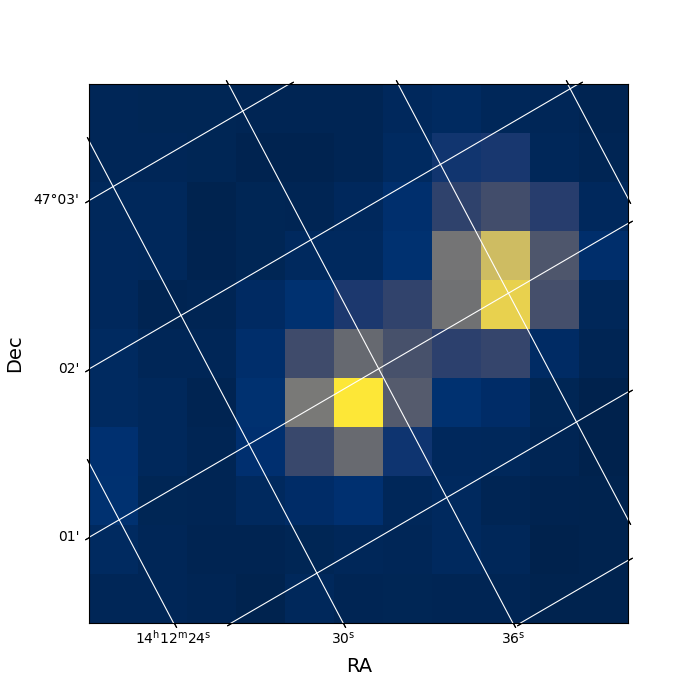

In [6]:
#Plot the first image of the FLUX Column with WCS overlay.
tphdu = fits.open(sector23_tpf)
tpf_data = tphdu[1].data
first_image = tpf_data['FLUX'][0]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize = (7,7))
fig.add_subplot(111, projection = wcs)
plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 14)
plt.ylabel(r'Dec', fontsize = 14)
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.show()


We can make the same plot for another sector, this time adding a colorbar.
Npote how the rotation of the eimage is changing from sector to sector.

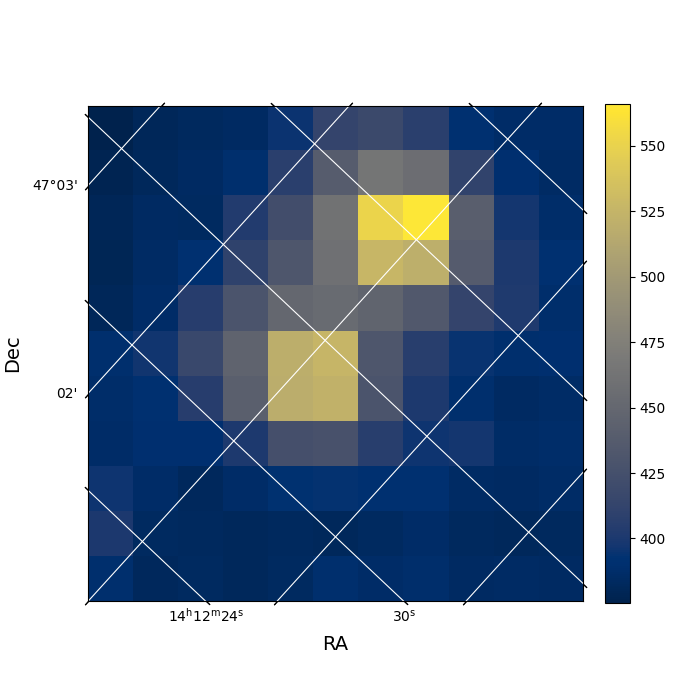

In [7]:


#Plot the first image of the FLUX Column with WCS overlay.
tphdu = fits.open(sector49_tpf)
tpf_data = tphdu[1].data
first_image = tpf_data['FLUX'][0]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111,projection=wcs)
im = plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 14)
plt.ylabel(r'Dec', fontsize = 14)
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()


## Fixing problems with plot visualization

If you get an error in visualizing the previous plots with the WCS grid:
1) Be sure to use the `astrolab2` environment in the laboratory computer. 
2) If you are using your own computer, follow the instructions on Moodle to install the `astrolab2`environment using the `conda_requirements.txt` file provided in Moodle.
3) If still not working, try to update your `matplotlib` and `astropy` package:
```bash
pip install -U matplotlib astropy
```
4) When running the Jupyter notebook, substitute `%matplotlib notebook` with `%matplotlib inline`. For Jupyter-lab, `%matplotlib widget` works well. 

## Displaying The Aperture Pixel Information
Let's read in the second FITS extension HDU to display the aperture information. First, let's read in the aperture pixels from the HDU.



In [8]:
ap_image = (tphdu[2].data)
print(ap_image)


[[129 133 133 133 133 129 129 129 133 129 129]
 [129 129 133 133 133 133 133 133 133 129 129]
 [129 129 133 129 129 129 129 129 129 129 129]
 [129 129 129 129 139 139 129 129 129 129 129]
 [129 129 129 139 139 139 129 133 133 129 129]
 [129 129 129 139 139 139 129 133 133 129 129]
 [133 129 129 139 139 139 129 129 129 129 129]
 [133 133 129 129 129 129 129 129 129 129 129]
 [133 133 129 129 129 129 129 129 129 129 129]
 [133 133 133 129 129 129 129 129 129 129 129]
 [129 129 129 129 129 129 129 129 129 129 129]]


We see the pixel values are integers, but what do they mean? \
The pixels are bitmasks that encode information about each pixel. A bitmask is base-2 (or binary) number where each figure (or bit) identifies a value (`False` if the bit is equal to $0$, `True` if the bit is equal to $1$ ) in a list of pre-determined conditions. 
For example, a pixel with an aperture value equal to $129$ can be broken down into this sum of powers of two: $133= 128+4+1 = 2^7 + 2^2 + 2^0 = 10000101$ in binary notation. Reading the binary number from roght to left, $10000101$ means that Conditions **1**, **3**, and **8** are `True`, all the others conditions are `False`. To know the actual meaing of the conditions, we have to check the [table of Aperture Mask Image Flags](https://outerspace.stsci.edu/display/TESS/2.0+-+Data+Product+Overview#id-2.0DataProductOverview-Table:ApertureMaskImageFlags) defined by the TESS team.  In this specific case, the conditions being true are :
1) Pixel was collected by the spacecraft.
2) Pixel was used in background calculation.
3) Pixel is on CCD output C
All the other conditions in the table are false.

`Numpy` has a built-in function that can convert an integer into a binary bit mask. Let's use that now one of the values we see in our displayed image above.

In [9]:
# Break down a pixel value of 129 (yellow pixels displayed above) into its constituent bits.
bits = np.binary_repr(129)
print(bits)

bits = np.binary_repr(139)
print(bits)


10000001
10001011


If we want to identify the pixels used to do aperture photometry, we have to select those pixels satisfying the second condition (value $2$, $10$ in binary number). In this case, we cannot simply select those pixel with value equal to $2$, as the number of the array is defined by the value of all the other conditions of the bitmask being `True`. 
In these cases, we need to individually compare each bit of two bitmasks (the one of the aperture and the condition that we want to select), i.e., we have to perform a **bitwise** operation. 
Binary bit-by-bit operations are already embedded in `numpy`, with the documentation available [on this page](https://numpy.org/doc/stable/reference/routines.bitwise.html). 

For example: \
The number 129 is represented by $10000001$.\
Likewise,  139 is represented by $10001011$.\
The bit-wise AND of 129 and 139 is perfomed by applying the logical operator AND for each couple of bit. In this case, the outcome is $10000001 = 129$

In [10]:
bitwise_and_result = np.bitwise_and(129, 139)
binary_result  = np.binary_repr(bitwise_and_result)
print(bitwise_and_result, binary_result)

129 10000001


## Plot the aperture bitmask

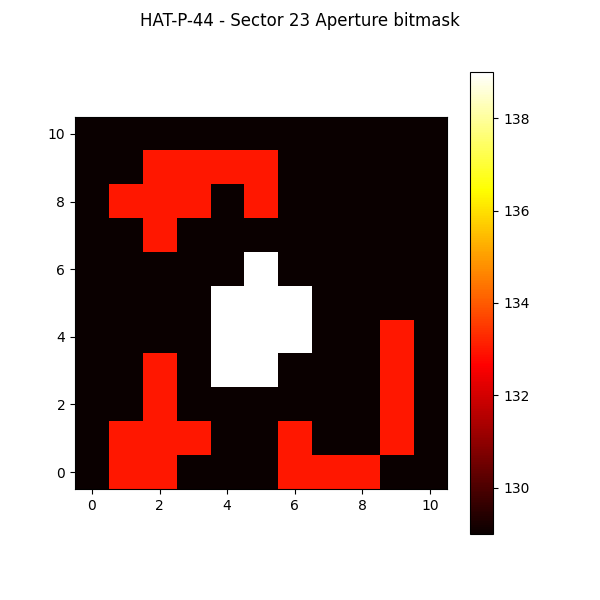

In [11]:
tphdu = fits.open(sector23_tpf)
aperture = tphdu[2].data

# Start figure and axis.
fig, ax = plt.subplots(figsize=(6,6))

cbx = ax.imshow(aperture, cmap=plt.cm.hot, origin="lower", alpha=1.0)

# Let's define a title for the figure.
fig.suptitle("HAT-P-44 - Sector 23 Aperture bitmask")

# Add a color bar.
cbar = fig.colorbar(cbx)
plt.show()